## 1. 엔터사 주식 상관관계 분석

- 대한민국 대표 엔터사들(JYP, YG, SM, HYBE)은 주가가 서로 유사하게 움직이는 지를 알아보기 위해 '피어슨 상관관계'를 구하고자 한다.
- 피어슨 상관계수는 주가를 바탕으로 -1에서 1 사이의 값을 리턴한다. 만약 상관계수가 0보다 크다면, 두 기업의 주가 사이에 양의 상관관계가 있다고 해석하고, 반대의 경우는 음의 상관관계가 있다고 해석 한다. 
- HYBE의 주식 상장일(2020-10-15)을 기준으로 하여 최근까지의 주가를 크롤링 해서 대표 엔터사들 간의 상관계수를 구해보자.

### 1) 대표 엔터 4사 주식 상관관계 분석

In [1]:
import FinanceDataReader as fdr
import pandas as pd

In [17]:
# 주식 종목 코드로 종가 데이터를 추출하여 stocks_df 에 저장하는 함수
def create_stocks_df(stocks, start_date, end_date):
    stock_df = fdr.DataReader(stock_code_list[stocks], start_date, end_date)
    stocks_df[stocks] = stock_df['Close'] # 날짜별 종가 추출

    return stocks_df

In [18]:
# stocks_df 생성
stock_code_list = {'HYBE':'352820', 'JYP':'035900', 'SM':'041510', 'YG':'122870'}
stocks_df = pd.DataFrame()

for stocks in stock_code_list.keys():
    create_stocks_df(stocks, '2020-10-15', '2023-05-25')

stocks_df

,HYBE,JYP,SM,YG
Date,,,,
2020-10-15,255420,34050,31850,44900
2020-10-16,198495,34550,30850,43850
2020-10-19,187110,33500,30400,42650
2020-10-20,180675,33400,30400,42950
2020-10-21,177210,33800,31200,42600
...,...,...,...,...
2023-05-19,281000,115700,107600,92000
2023-05-22,269000,114100,106900,90800
2023-05-23,273000,115700,108100,92800


In [19]:
stocks_df.describe()

,HYBE,JYP,SM,YG
count,647.000000,647.000000,647.000000,647.000000
mean,230021.159196,51995.131376,65328.361669,53243.972179
std,67484.297985,15699.273423,24490.908374,8767.181847
min,109500.000000,30550.000000,28100.000000,38700.000000
25%,172750.000000,39500.000000,46475.000000,46025.000000
50%,228690.000000,50200.000000,68200.000000,52700.000000
75%,283500.000000,60300.000000,76450.000000,57500.000000
max,414000.000000,119800.000000,158500.000000,92800.000000


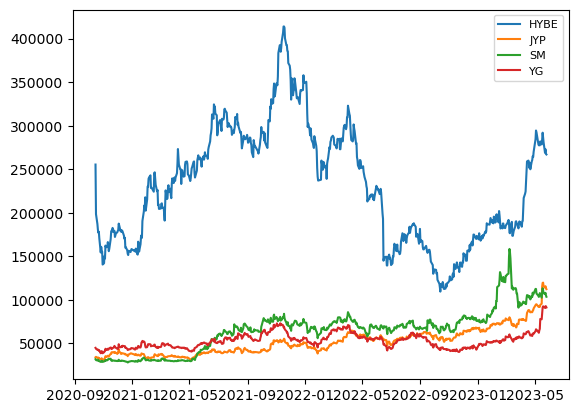

In [20]:
import matplotlib.pyplot as plt

plt.plot(stocks_df)
plt.legend(stock_code_list.keys(), fontsize = 8)

In [6]:
stocks_df.corr(method = 'pearson')

,HYBE,JYP,SM,YG
HYBE,1.000000,-0.112924,0.100386,0.590621
JYP,-0.112924,1.000000,0.842680,0.530901
SM,0.100386,0.842680,1.000000,0.565993
YG,0.590621,0.530901,0.565993,1.000000


상관관계 분석)
- HYBE와 YG는 중간정도의 양의 상관관계를 가진다.
-  JYP와 SM 은 0.84로 큰 양의 상관관계를 가지는 것으로 보아 거의 유사하게 주가가 변동함을 알 수 있다. 
- JYP와 YG는 중간 정도의 양의 상관관계를 가진다. 
- SM과 YG는 중간 정도의 양의 상관관계를 가진다. 

분석 결과) <br>
대표 엔터 3사(JYP, SM, YG)는 전체적으로 유사하게 주가가 변동함을 알 수 있고 HYBE는 YG를 제외하고는 상관관계가 약하다는 것을 알 수 있다.<br>

때문에, HYBE를 제외하여 대표 엔터 3사의 상관계수 분석을 기간을 5년으로 늘려 분석하고자 한다.

-----

### 2) 대표 엔터 3사(JYP, SM, YG) 주식 상관관계 분석

In [28]:
stock_code_list = {'JYP':'035900', 'SM':'041510', 'YG':'122870'}
stocks_df = pd.DataFrame()

for stocks in stock_code_list.keys():
    create_stocks_df(stocks, '2018-01-01', '2023-01-01')

stocks_five_years_df = stocks_df
stocks_five_years_df.head()

,JYP,SM,YG
Date,,,
2018-01-02,13350,34750,28600
2018-01-03,13150,33500,28200
2018-01-04,12800,33000,27300
2018-01-05,13350,33700,27600
2018-01-08,12900,33650,27000


In [29]:
stocks_five_years_df.shape

(1232, 3)

<Axes: xlabel='Date'>

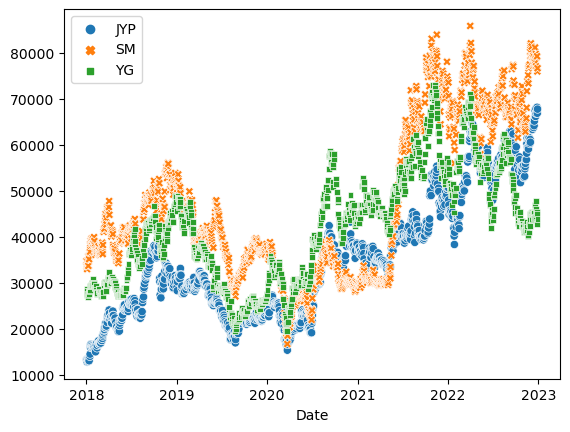

In [12]:
import seaborn as sns
sns.scatterplot(stocks_five_years_df)

In [11]:
stocks_five_years_df.corr(method = 'pearson')

,JYP,SM,YG
JYP,1.000000,0.830382,0.820701
SM,0.830382,1.000000,0.725077
YG,0.820701,0.725077,1.000000


C:\Users\k9942\AppData\Local\Temp\ipykernel_14900\1436734566.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot = sns.heatmap(stocks_five_years_df.corr(method = 'pearson'), cmap='YlOrRd', annot=True)


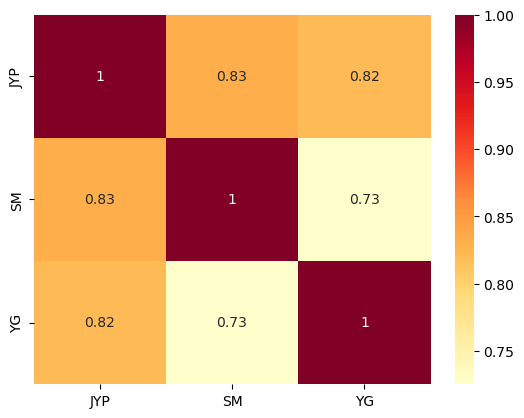

In [35]:
import seaborn as sns
plot = sns.heatmap(stocks_five_years_df.corr(method = 'pearson'), cmap='YlOrRd', annot=True)

상관관계 분석)
- JYP, SM, YG 모두 강한 양의 상관관계가 있다.

분석 결과) <br>
3사 모두 큰 양의 상관관계가 있음을 알 수 있다. 그렇다면, 엔터사 별로 소속가수의 앨범이 나왔을 때 그 회사의 주가가 다른 회사들에 비해 변동성이 큰지 알아보자.

----